In [1]:
import numpy as np
import pandas as pd

num_samples = 100
np.random.seed(42)

tds = np.random.uniform(0, 500, num_samples)  # TDS values < 500 mg/l
turbidity = np.random.uniform(0, 10, num_samples)  # Turbidity < 10 NTU
ph = np.random.uniform(6, 8.5, num_samples)  # pH range between 6 and 8.5
depth = np.random.uniform(0.5, 5, num_samples)  # Depth in meters
flow_discharge = np.random.uniform(1, 100, num_samples)  # Flow discharge in liters per minute

filter_life_span = np.maximum(500, 5000 - (tds * 0.5 + turbidity * 50 + (7.0 - ph) * 100 + depth * 100 + flow_discharge * 2))

filter_efficiency = 95 - (tds * 0.005 + turbidity * 0.2 + (7.0 - ph) * 1 + depth * 1 + flow_discharge * 0.03)
filter_efficiency = np.maximum(75, filter_efficiency)  

data = pd.DataFrame({
    'TDS (mg/l)': tds,
    'Turbidity (NTU)': turbidity,
    'pH': ph,
    'Depth (m)': depth,
    'Flow Discharge (L/min)': flow_discharge,
    'Filter Life Span (hours)': filter_life_span,
    'Filter Efficiency (%)': filter_efficiency
})

data.head()

,TDS (mg/l),Turbidity (NTU),pH,Depth (m),Flow Discharge (L/min),Filter Life Span (hours),Filter Efficiency (%)
0,187.270059,0.314292,7.605079,0.732568,11.209263,4855.482988,93.537025
1,475.357153,6.364104,6.210350,2.891096,90.352738,3895.336149,84.959065
2,365.996971,3.143560,6.404072,2.932858,51.019985,4204.904928,87.481917
3,299.329242,5.085707,8.246385,3.368435,82.819289,4218.206547,87.879585
4,78.009320,9.075665,7.516073,3.767411,32.684911,4116.708447,88.562935


In [2]:
data.describe()

,TDS (mg/l),Turbidity (NTU),pH,Depth (m),Flow Discharge (L/min),Filter Life Span (hours),Filter Efficiency (%)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,235.090372,4.978317,7.294003,2.710170,52.088536,4287.745189,88.850062
std,148.744706,2.931113,0.733566,1.320535,31.541489,243.345476,2.188047
min,2.761059,0.069521,6.012654,0.564771,2.072927,3844.796717,84.708532
25%,96.600380,2.420045,6.692200,1.623267,27.129550,4130.221470,87.368586
50%,232.071227,5.056249,7.406387,2.793732,53.014548,4256.029658,88.571031
75%,365.101560,7.661836,7.880917,3.810999,79.891533,4459.871046,90.432758
max,493.443468,9.856505,8.475135,4.957273,99.303515,4855.482988,94.091863


In [3]:
data = data.round(3)

In [4]:
data.head()

,TDS (mg/l),Turbidity (NTU),pH,Depth (m),Flow Discharge (L/min),Filter Life Span (hours),Filter Efficiency (%)
0,187.270,0.314,7.605,0.733,11.209,4855.483,93.537
1,475.357,6.364,6.210,2.891,90.353,3895.336,84.959
2,365.997,3.144,6.404,2.933,51.020,4204.905,87.482
3,299.329,5.086,8.246,3.368,82.819,4218.207,87.880
4,78.009,9.076,7.516,3.767,32.685,4116.708,88.563


In [5]:
data.describe()

,TDS (mg/l),Turbidity (NTU),pH,Depth (m),Flow Discharge (L/min),Filter Life Span (hours),Filter Efficiency (%)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,235.090350,4.978350,7.294010,2.710150,52.088560,4287.745190,88.850070
std,148.744691,2.931081,0.733566,1.320539,31.541471,243.345472,2.188104
min,2.761000,0.070000,6.013000,0.565000,2.073000,3844.797000,84.709000
25%,96.600000,2.420500,6.692250,1.623250,27.129750,4130.221500,87.368500
50%,232.071000,5.056500,7.406500,2.793500,53.014500,4256.029500,88.571000
75%,365.101500,7.661750,7.880750,3.811250,79.891250,4459.871000,90.433000
max,493.443000,9.857000,8.475000,4.957000,99.304000,4855.483000,94.092000


In [6]:
#data.to_csv('grey_water_management.csv', index=False)

## Plots

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Correlation Heatmap

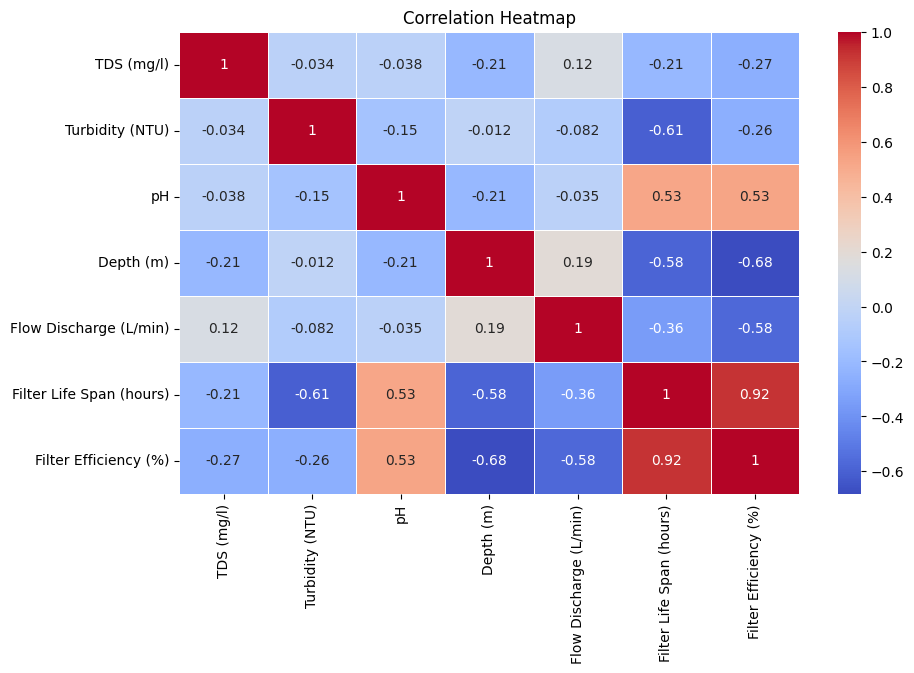

In [8]:
plt.figure(figsize=(10, 6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### PairPlot

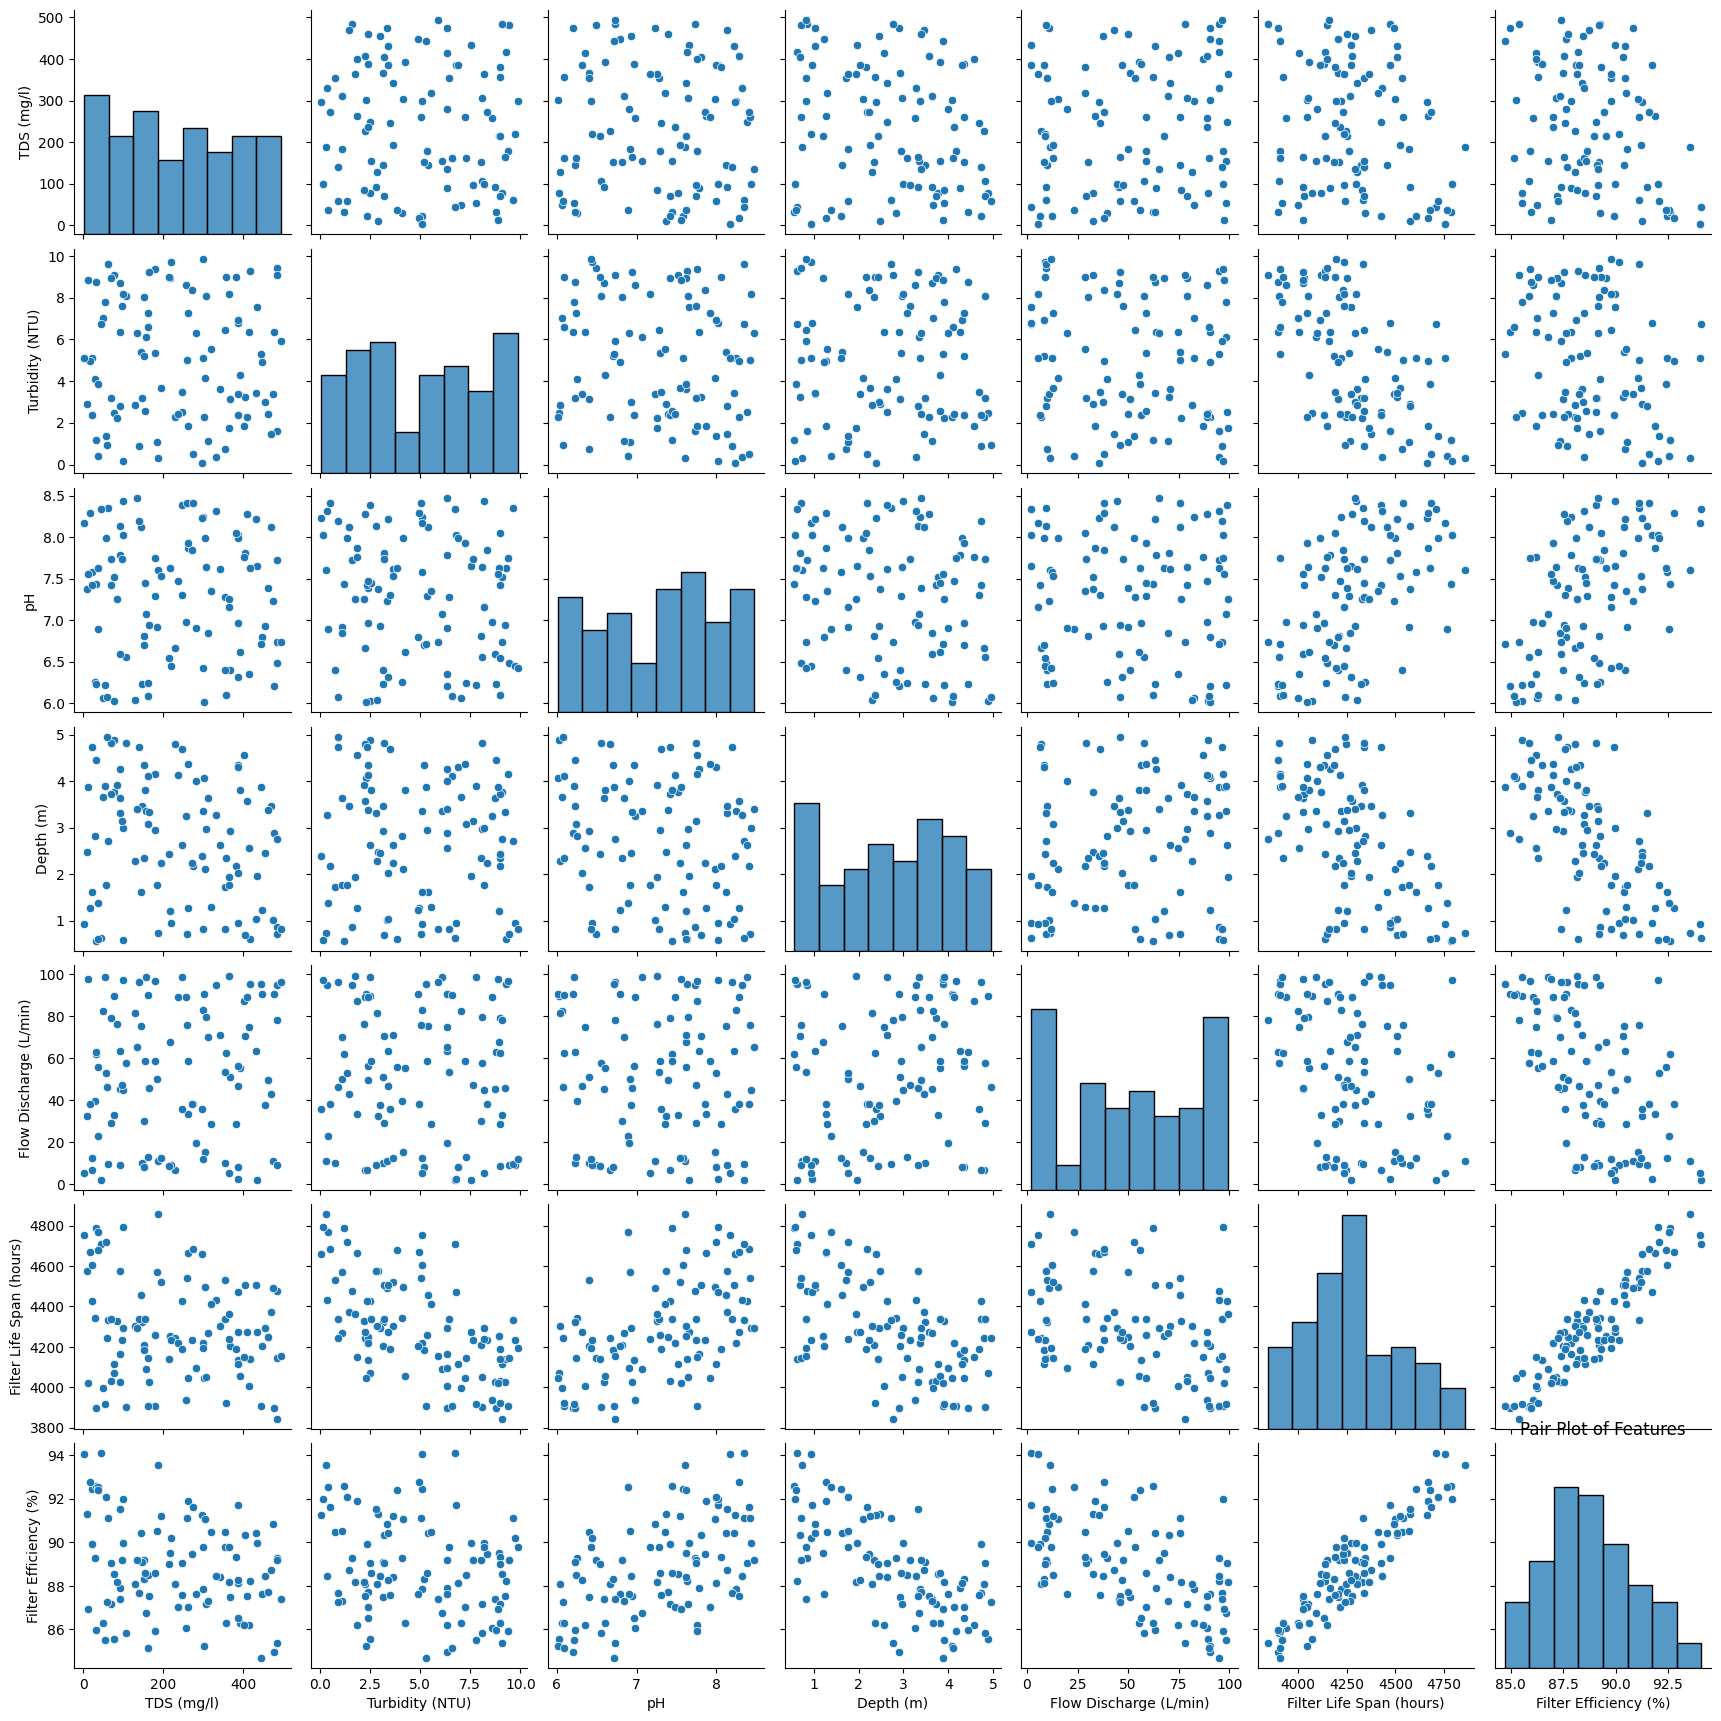

In [9]:
sns.pairplot(data)
plt.title('Pair Plot of Features')
plt.show()

## Histogram

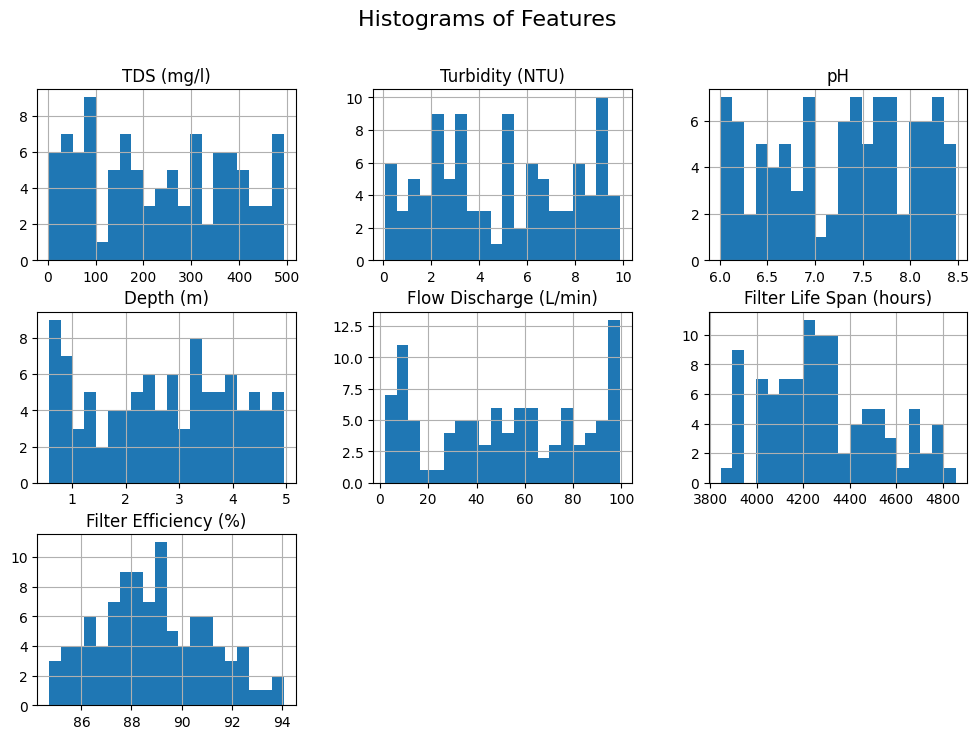

In [10]:
data.hist(figsize=(12, 8), bins=20)
plt.suptitle('Histograms of Features', fontsize=16)
plt.show()

## Box Plot

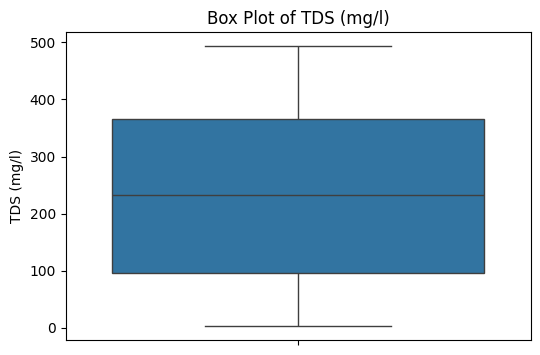

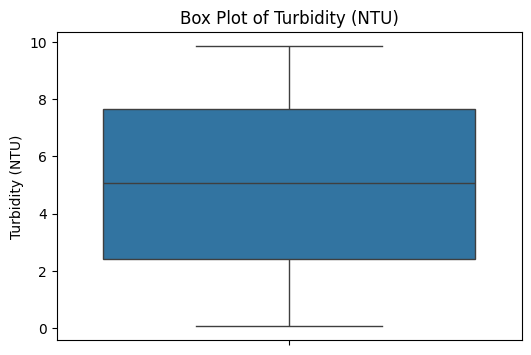

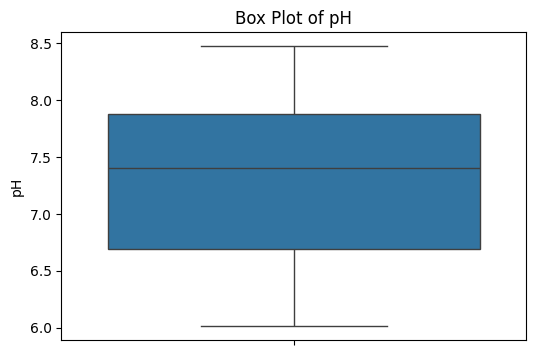

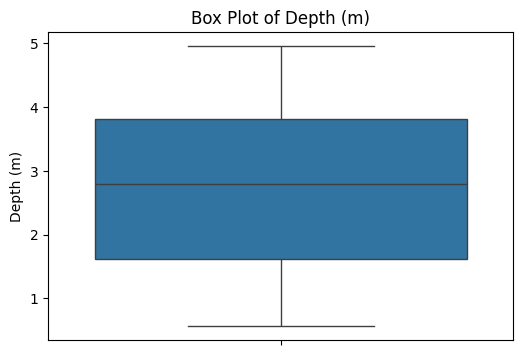

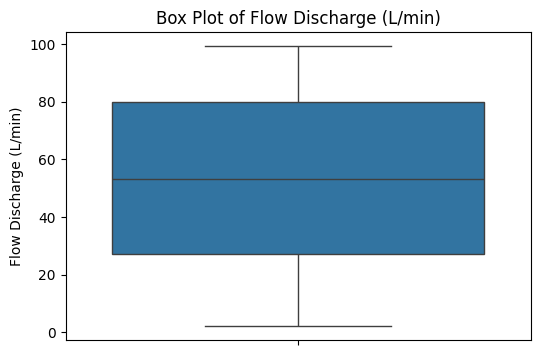

In [11]:
features = ['TDS (mg/l)', 'Turbidity (NTU)', 'pH', 'Depth (m)', 'Flow Discharge (L/min)']

# Loop through each feature and create a separate box plot
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=feature, data=data)
    plt.title(f'Box Plot of {feature}')
    plt.show()

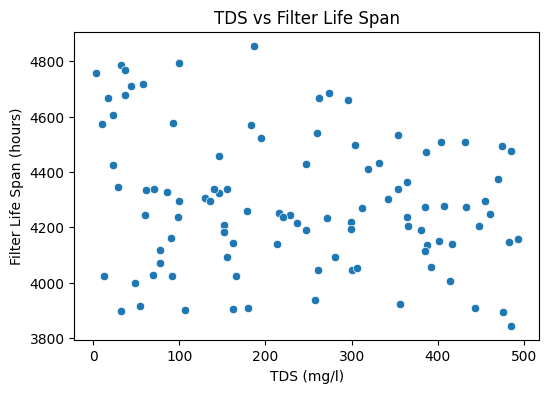

In [12]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='TDS (mg/l)', y='Filter Life Span (hours)', data=data)
plt.title('TDS vs Filter Life Span')
plt.show()

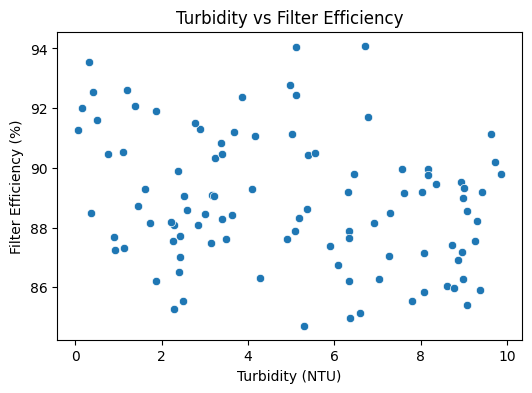

In [13]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Turbidity (NTU)', y='Filter Efficiency (%)', data=data)
plt.title('Turbidity vs Filter Efficiency')
plt.show()

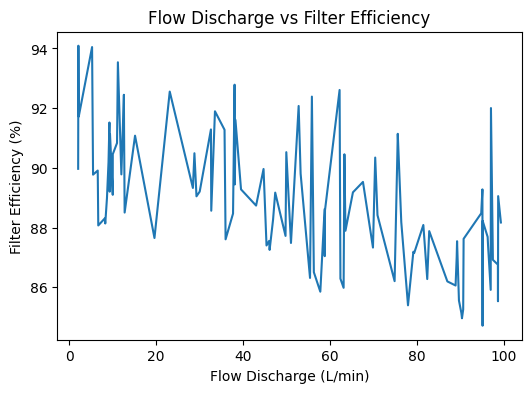

In [14]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='Flow Discharge (L/min)', y='Filter Efficiency (%)', data=data)
plt.title('Flow Discharge vs Filter Efficiency')
plt.show()

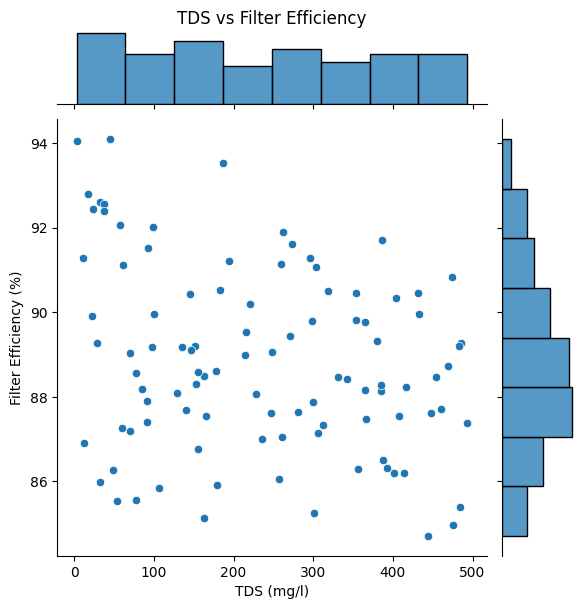

In [15]:
sns.jointplot(x='TDS (mg/l)', y='Filter Efficiency (%)', data=data, kind='scatter', height=6)
plt.title('TDS vs Filter Efficiency', y=1.2)
plt.show()

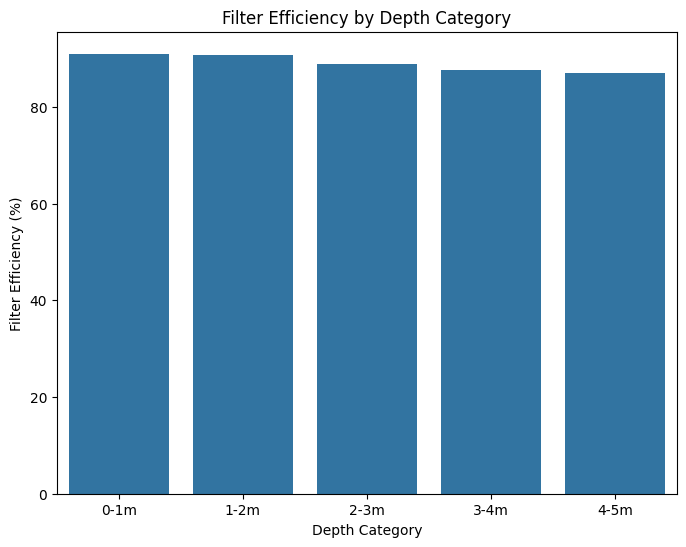

In [16]:
data['Depth Category'] = pd.cut(data['Depth (m)'], bins=[0, 1, 2, 3, 4, 5], labels=['0-1m', '1-2m', '2-3m', '3-4m', '4-5m'])
plt.figure(figsize=(8, 6))
sns.barplot(x='Depth Category', y='Filter Efficiency (%)', data=data, errorbar=None)
plt.title('Filter Efficiency by Depth Category')
plt.show()


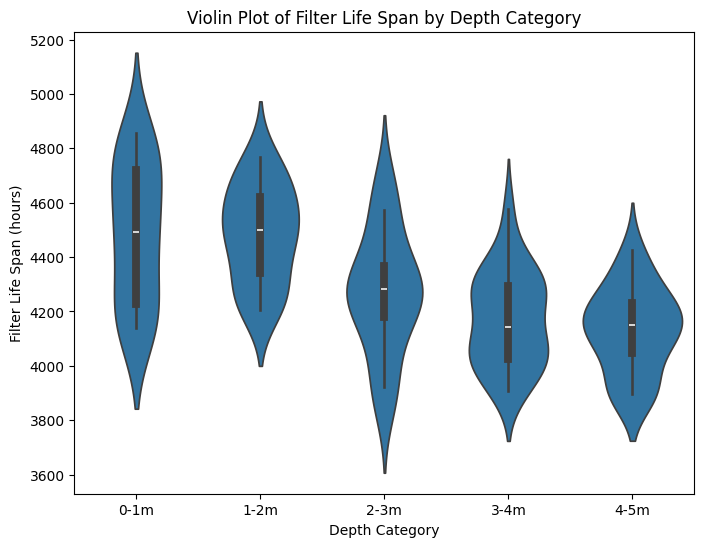

In [17]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Depth Category', y='Filter Life Span (hours)', data=data)
plt.title('Violin Plot of Filter Life Span by Depth Category')
plt.show()

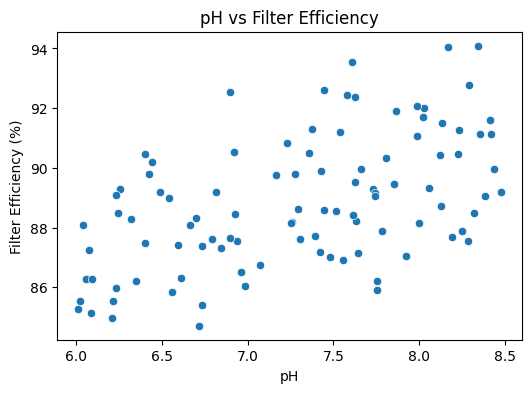

In [19]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='pH', y='Filter Efficiency (%)', data=data)
plt.title('pH vs Filter Efficiency')
plt.show()


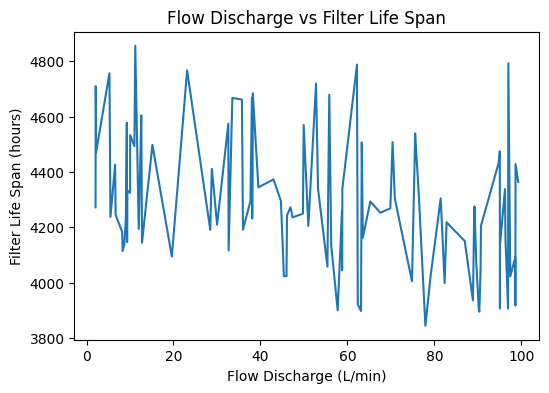

In [20]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='Flow Discharge (L/min)', y='Filter Life Span (hours)', data=data)
plt.title('Flow Discharge vs Filter Life Span')
plt.show()
